In [2]:
cd ..

/home/mars/mount/src_aiai


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from src.operators.measurement import NUFFT_op, FFT_op
from src.visualisation import compare
from src.sampling.uv_sampling import spider_sampling

In [39]:
from scipy.misc import ascent

In [40]:
im = ascent()[::2, ::2]

In [47]:
from src.operators.measurement import NUFFT_op
Nd = (256,256)
Kd = (512,512)
Jd = (6,6)

uv = spider_sampling()
op = NUFFT_op()
op.plan(uv, Nd, Kd, Jd, batch_size=None)

x_true_test = np.squeeze(np.load(f"./data/intermediate/COCO/x_true_test_30dB.npy"))
y = op.dir_op(x_true_test)
np.save("test.npy")


100%|██████████| 4440/4440 [00:00<00:00, 5423.35it/s]


KeyboardInterrupt: 

In [19]:
op_fft = FFT_op(uv)

In [15]:
x0 = np.ones(Nd)
y0 = np.ones((4440))

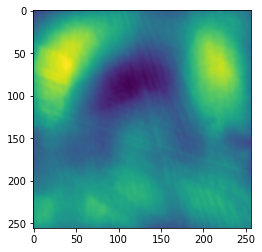

In [41]:
plt.imshow(op.adj_op(op.dir_op(im)).real)

In [45]:
i, j = np.mgrid[:Nd[0], :Nd[1]]
circ = (i-Nd[0]/2)**2 + (j-Nd[1]/2)**2 < (Nd[0]/8)**2

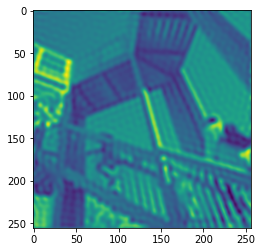

In [46]:
plt.imshow(op_fft._ifft(op_fft._fft(im) * circ).real)